PHASE 2 PROJECT.

HERE WE ARE GOING TO ANALYSE THE MOVIES AND THE GENRE THAT ARE THE MOST POPULAR AND GIVE RECOMENDATIONS TO THE INVESTORS ON WHAT STUDIO SET TO INVEST IN.

THIS IS THE ANALYSIS OF IMDB DATA AND ITS RECOMENDATIONS.

In [49]:
#IMPORTING THE NECESSARY TOOLS FOR ANALYSIS
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle

In [50]:
# for data analysis and manipulation
import pandas as pd
# for numerical operations 
import numpy as np
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt 

In [51]:
df = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\using\bom.movie_gross.csv')
df.head(30)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [52]:
df = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\tmdb.movies.csv')
df.head(30)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [53]:
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\using\bom.movie_gross.csv')
df2 = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\tmdb.movies.csv')

# Print columns of both DataFrames
print("DF1 Columns:")
print(df1.columns)
print("\nDF2 Columns:")
print(df2.columns)


DF1 Columns:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

DF2 Columns:
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


FROM THIS INITIAL DATA WE FIND THAT THE TOP FIVE MOVIES THAT DID WELL ARE;

HARRY POTTER

HOW TO TRAIN YOUR DRAGON

IRON MAN

TOY STORY 

INCEPTION STORY 

INCEPTION

In [54]:
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\using\bom.movie_gross.csv')
df2 = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\tmdb.movies.csv')

# Print columns to verify the presence of 'title'
print("DF1 Columns:")
print(df1.columns)
print("\nDF2 Columns:")
print(df2.columns)

# Merge DataFrames on the 'title' column
# Make sure 'title' exists in both DataFrames
merged_df = pd.merge(df1, df2, left_on='title', right_on='original_title', how='inner')

# Display the first few rows of the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df.head(30))

# save the merged DataFrame to a new CSV file
merged_df.to_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\merged_movies.csv', index=False)


DF1 Columns:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

DF2 Columns:
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

Merged DataFrame:
                                              title_x   studio  \
0                                         Toy Story 3       BV   
1                                           Inception       WB   
2                                 Shrek Forever After     P/DW   
3                          The Twilight Saga: Eclipse     Sum.   
4                                          Iron Man 2     Par.   
5                                             Tangled       BV   
6                                       Despicable Me     Uni.   
7                            How to Train Your Dragon     P/DW   
8   The Chronicles of Narnia: The Voyage of the Da...      Fox   
9                             

In [55]:
merged_df.head(30)

,title_x,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title_y,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
5,Tangled,BV,200800000.0,391000000,2010,13,"[16, 10751]",38757,en,Tangled,21.511,2010-11-24,Tangled,7.5,6407
6,Despicable Me,Uni.,251500000.0,291600000,2010,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
7,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000,2010,22,"[12, 10751, 14]",10140,en,The Chronicles of Narnia: The Voyage of the Da...,17.382,2010-12-10,The Chronicles of Narnia: The Voyage of the Da...,6.3,3196
9,The King's Speech,Wein.,135500000.0,275400000,2010,25,"[18, 36]",45269,en,The King's Speech,16.798,2010-09-06,The King's Speech,7.7,5013


In [56]:
# Create a new column 'title_combined' with combined values from 'title_x' and 'title_y'
merged_df['title_combined'] = merged_df['title_x'].combine_first(merged_df['title_y'])

# Drop the original title columns if they are no longer needed
merged_df = merged_df.drop(columns=['title_x', 'title_y'])

# Display the first few rows of the updated DataFrame
print("\nUpdated DataFrame:")
print(merged_df.head(30))



Updated DataFrame:
     studio  domestic_gross foreign_gross  year  Unnamed: 0  \
0        BV     415000000.0     652000000  2010           7   
1        WB     292600000.0     535700000  2010           4   
2      P/DW     238700000.0     513900000  2010          38   
3      Sum.     300500000.0     398000000  2010          15   
4      Par.     312400000.0     311500000  2010           2   
5        BV     200800000.0     391000000  2010          13   
6      Uni.     251500000.0     291600000  2010           8   
7      P/DW     217600000.0     277300000  2010           1   
8       Fox     104400000.0     311300000  2010          22   
9     Wein.     135500000.0     275400000  2010          25   
10     Sony     176600000.0     182500000  2010          76   
11       BV      90800000.0     245600000  2010          55   
12     FoxS     107000000.0     222400000  2010          47   
13     P/DW     148400000.0     173500000  2010           9   
14     Uni.     105300000.0     216

In [57]:
# Save the updated DataFrame to a new CSV file
merged_df.to_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\merged_movies_updated.csv', index=False)


In [58]:
merged_df.head(20)

,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,title_combined
0,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,Toy Story 3
1,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,Inception
2,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,Shrek Forever After
3,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,The Twilight Saga: Eclipse
4,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,Iron Man 2
5,BV,200800000.0,391000000,2010,13,"[16, 10751]",38757,en,Tangled,21.511,2010-11-24,7.5,6407,Tangled
6,Uni.,251500000.0,291600000,2010,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,7.2,10057,Despicable Me
7,P/DW,217600000.0,277300000,2010,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,How to Train Your Dragon
8,Fox,104400000.0,311300000,2010,22,"[12, 10751, 14]",10140,en,The Chronicles of Narnia: The Voyage of the Da...,17.382,2010-12-10,6.3,3196,The Chronicles of Narnia: The Voyage of the Da...
9,Wein.,135500000.0,275400000,2010,25,"[18, 36]",45269,en,The King's Speech,16.798,2010-09-06,7.7,5013,The King's Speech


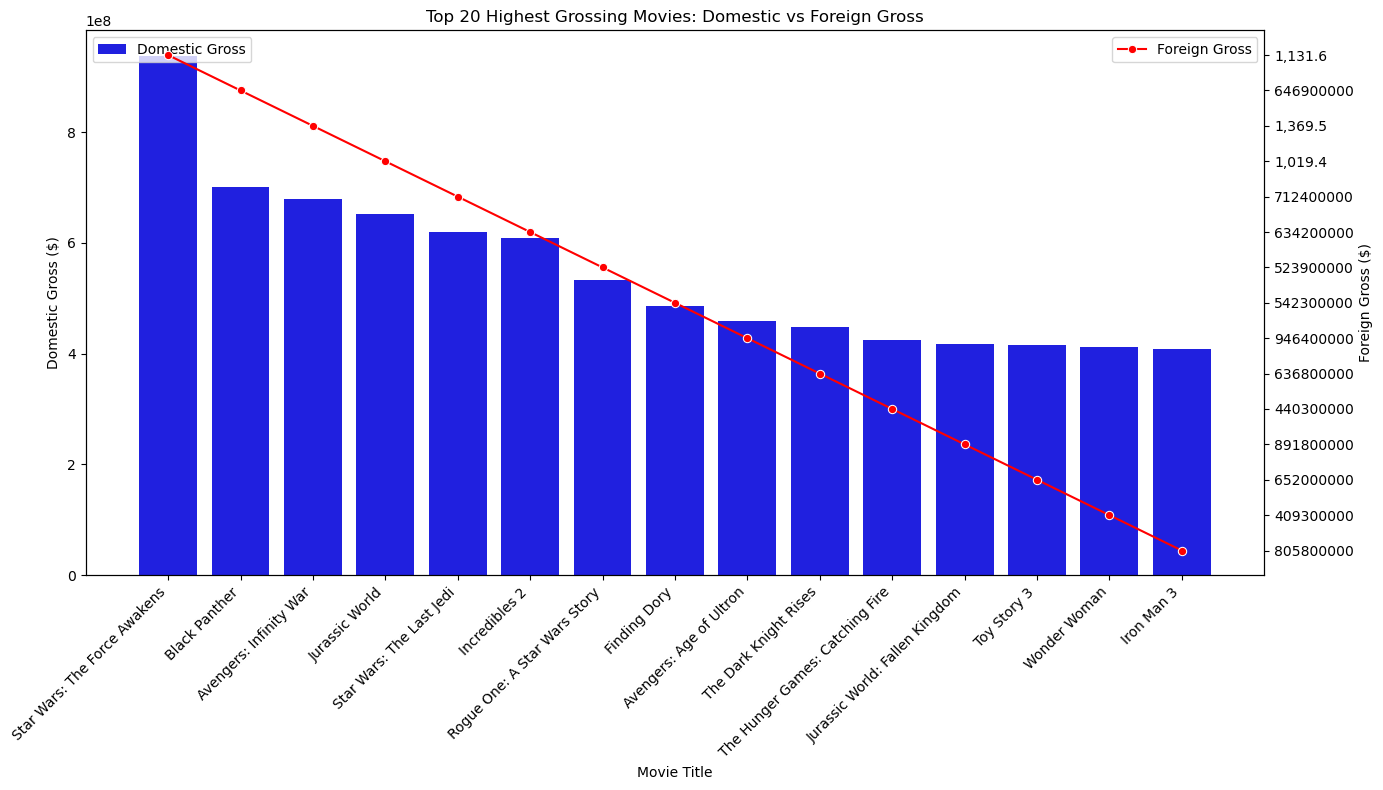

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Sort DataFrame by 'domestic_gross' in descending order
df_sorted = merged_df.sort_values(by='domestic_gross', ascending=False).head(20)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bars for domestic gross
sns.barplot(x='title_combined', y='domestic_gross', data=df_sorted, ax=ax1, color='b', label='Domestic Gross')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Plot line for foreign gross
sns.lineplot(x='title_combined', y='foreign_gross', data=df_sorted, ax=ax2, color='r', marker='o', label='Foreign Gross')

# Customize the plot
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Domestic Gross ($)')
ax2.set_ylabel('Foreign Gross ($)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Top 20 Highest Grossing Movies: Domestic vs Foreign Gross')
plt.tight_layout()

# Show the plot
plt.show()


STAR WARS WHICH IS AN SCIFI ACTION MOVIE HAS A HIGHEST GROSS BOTH DOMESTICALLY AND INTERNATIONALLY.

THIS IS FOLLOWED BY BLACK PANTHER AND INFINITY WAR THAT ARE ON THE SAME GENRE OF MOVIES.

THERE ARE 3 ANIMATIONS ON THE TOP 20 THAT ARE MAKING PROFITS I.E INCREDIBLES, FINDING DORY AND TOY STORY.

THE GROSS OF MOVIES IS SIGNIFICANTLY HIGHER IN DOMESTIC THAN FOREIGN BUT EXCLUDING THE 6 FIRST MOVIES THAT HAVE GREAT SUCCESS FOREIGN GROSS. 

In [60]:
df_sorted.head(5)

,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,title_combined
1187,BV,936700000.0,"1,131.6",2015,17385,"[28, 12, 878, 14]",140607,en,Star Wars: The Force Awakens,32.281,2015-12-18,7.4,12641,Star Wars: The Force Awakens
1186,BV,936700000.0,"1,131.6",2015,14172,"[28, 12, 878, 14]",140607,en,Star Wars: The Force Awakens,32.281,2015-12-18,7.4,12641,Star Wars: The Force Awakens
2100,BV,700100000.0,646900000,2018,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,7.4,12365,Black Panther
2099,BV,700100000.0,646900000,2018,3444,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,5.1,11,Black Panther
2098,BV,678800000.0,"1,369.5",2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,Avengers: Infinity War


In [61]:
import pandas as pd

# Load your DataFrame
# merged_df 

# 'studio', 'vote_average', and 'vote_count' columns are present in the DataFrame

# Aggregate by studio
studio_aggregates = merged_df.groupby('studio').agg(
    average_vote=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum')
).reset_index()

# Sort by average_vote and total_votes in descending order
sorted_studios = studio_aggregates.sort_values(by=['average_vote', 'total_votes'], ascending=[False, False])

# Select the top 10 studios
top_10_studios = sorted_studios.head(10)

# Display the results
print(top_10_studios)


        studio  average_vote  total_votes
124         RF      8.700000            3
69   Good Deed      8.200000         2400
110      Orion      7.800000          321
169       Yash      7.800000            3
116        PDA      7.733333         1177
17       Arth.      7.700000           51
153        U/P      7.600000         3188
36   Cleopatra      7.500000         1000
131         SD      7.500000          196
134        SHO      7.500000           73


In [62]:
top_10_studios.head(20)

,studio,average_vote,total_votes
124,RF,8.700000,3
69,Good Deed,8.200000,2400
110,Orion,7.800000,321
169,Yash,7.800000,3
116,PDA,7.733333,1177
17,Arth.,7.700000,51
153,U/P,7.600000,3188
36,Cleopatra,7.500000,1000
131,SD,7.500000,196
134,SHO,7.500000,73


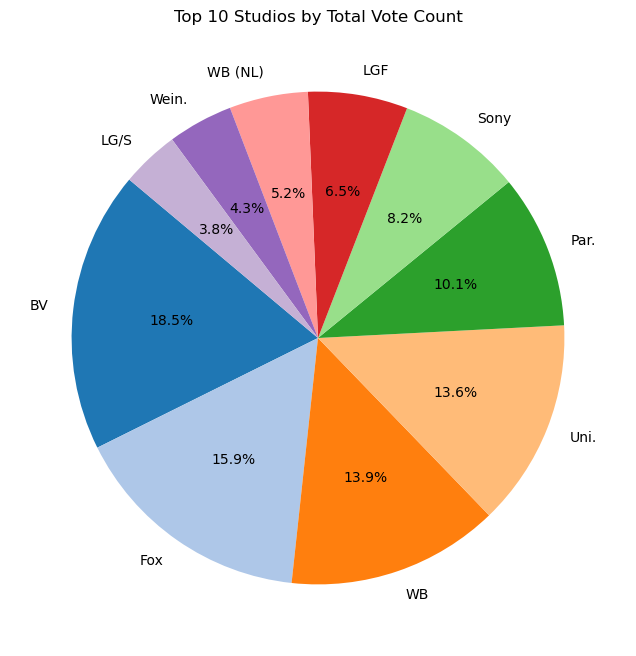

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


# Aggregate by studio
studio_aggregates = merged_df.groupby('studio').agg(
    average_vote=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum')
).reset_index()

# Sort by total_votes in descending order
sorted_studios = studio_aggregates.sort_values(by='total_votes', ascending=False)

# Select the top 10 studios
top_10_studios = sorted_studios.head(10)

# Plot a pie chart
fig, ax = plt.subplots(figsize=(10, 8))

# Pie chart
ax.pie(top_10_studios['total_votes'], 
       labels=top_10_studios['studio'], 
       autopct='%1.1f%%', 
       startangle=140, 
       colors=plt.cm.tab20.colors)

# Title
ax.set_title('Top 10 Studios by Total Vote Count')

plt.show()


WE RECOMMEND BV STUDIOS TO OUR INVESTORS.

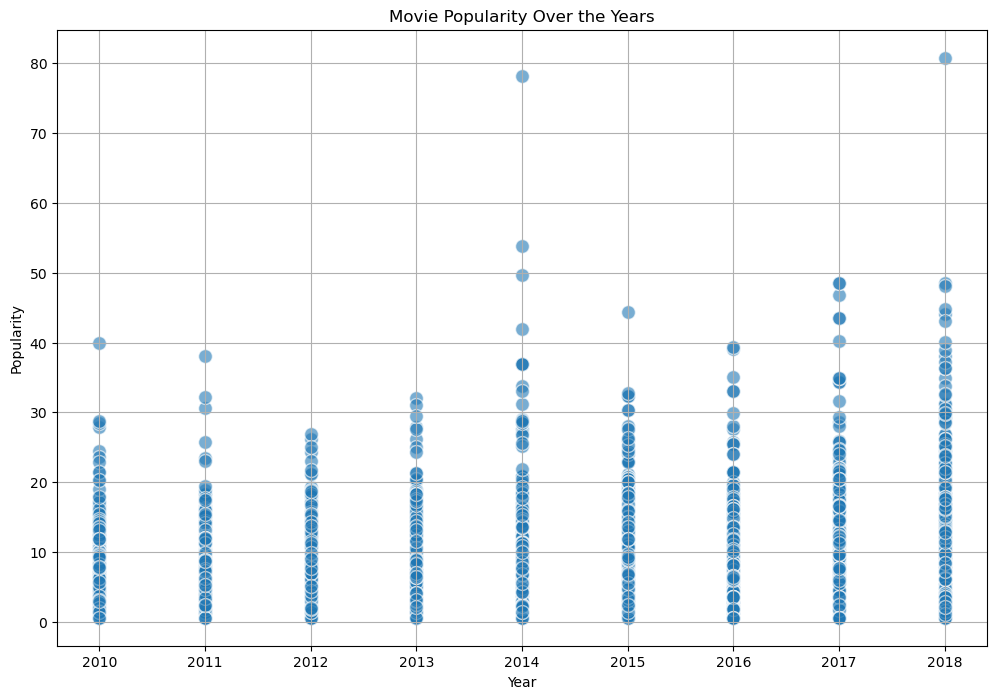

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure that 'popularity' and 'year' columns are present in the DataFrame

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
ax.scatter(merged_df['year'], merged_df['popularity'], alpha=0.6, edgecolors='w', s=100)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')
ax.set_title('Movie Popularity Over the Years')

# Show grid
ax.grid(True)

# Show plot
plt.show()


THERE IS SIGNIFICANT INCREASE IN THE NUMBER OF MIVIES BEING WATCHED FROM 2010 TO 2018 WITH A PEAK HIGH IN 2018 WITH A POPULARITY OF 80.

In [65]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load DataFrame
# merged_df

# Ensure the DataFrame contains necessary columns
# Clean data 
data = merged_df[['popularity', 'vote_average']].dropna()

# Sort data by 'popularity' (or any other criterion) and select the top 20
top_20_data = data.sort_values(by='popularity', ascending=False).head(20)

# Separate features (X) and target (y)
X = top_20_data[['vote_average']]  # Feature
y = top_20_data['popularity']      # Target


In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 260.4566087361488
R^2 Score: -0.029365615217444185


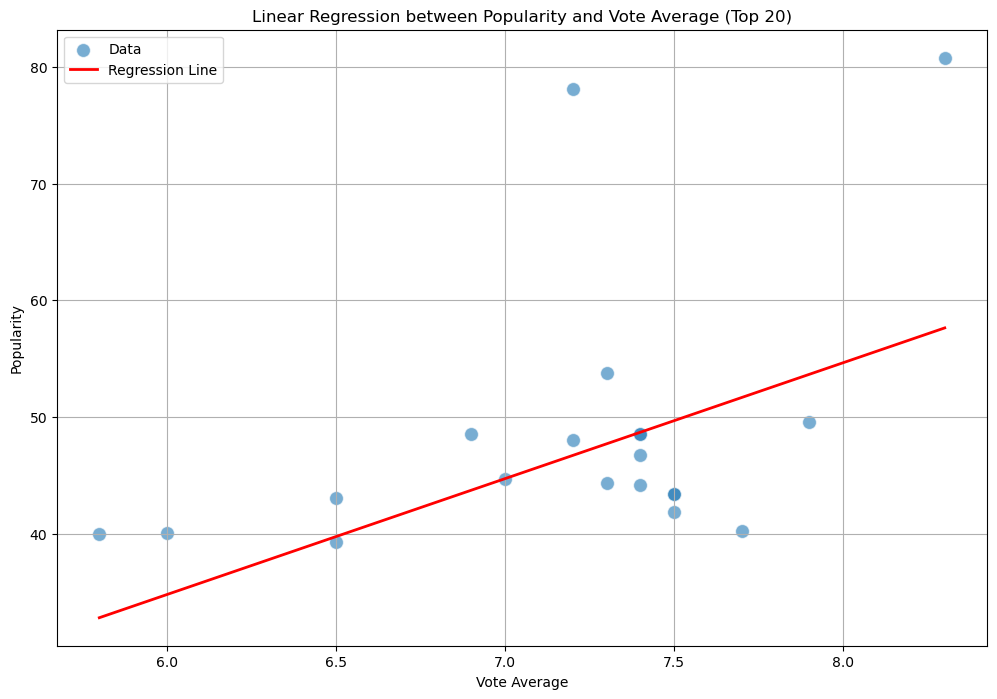

In [68]:
# Plot
plt.figure(figsize=(12, 8))

# Scatter plot of the original data
sns.scatterplot(data=top_20_data, x='vote_average', y='popularity', alpha=0.6, edgecolor='w', s=100, label='Data')

# Plot the regression line
x_range = np.linspace(top_20_data['vote_average'].min(), top_20_data['vote_average'].max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Linear Regression between Popularity and Vote Average (Top 20)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [69]:


# Sample data for demonstration
# merged_df

# Define bins and labels
bins = [0, 5, 6, 7, 8, 10]  # Adjust bins based on your data distribution
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'vote_average_category'
merged_df['vote_average_category'] = pd.cut(merged_df['vote_average'], bins=bins, labels=labels)

# Group data by 'vote_average_category'
grouped_data = merged_df.groupby('vote_average_category')['popularity'].apply(list)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')


F-statistic: 37.76846132230437
P-value: 1.2438797969740367e-30


FROM THE ANOVA WE FIND AN AVERAGE POPULARITY OF 37.768.